In [1]:
!pip install qiskit
!pip install qiskit[visualization]
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=a3680a7a203f1314885d0516fbc103d876da68559538a6d5342808ea702ca21a
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c0040

In [2]:
import qiskit
!pip install qiskit-ignis
from qiskit.compiler import transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.visualization import *
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import U1Gate, U2Gate, RXGate
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.7/198.7 kB 4.3 MB/s eta 0:00:00


<ipython-input-2-514d579f2a83>:9: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,


In [3]:
qubits = [0, 1]
shots = 8192

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

dt_times = np.linspace(0,1332000,75)

In [4]:
def pad_id_gates(circuit, qr, qubit, num_of_id_gates):
    """
    A function for padding a circuit with single-qubit delay gates.
    Args:
        circuit (QuantumCircuit): the quantum circuit that the gates should be
            appended to
        qr (QuantumRegister): the qubit register where the gates should be added
        qubit (int): index of qubit where the gates should be added
        num_of_id_gates (int): the number of delay gates to add
    Returns:
        circuit: The original circuit object, but with delay
            gates added to the qubit register qr at qubit 'qubit'
    """

    #circuit.barrier(qr[qubit])
    num_of_id_gates = int(num_of_id_gates)
    circuit.delay(num_of_id_gates, qr[qubit], unit = 'dt')

    circuit.barrier(qr[qubit])
    return circuit

In [5]:
import qiskit
qiskit.circuit.Delay(10, unit='dt')

Delay(duration=10[unit=dt])

In [6]:
import qiskit

# Define your Quantum Register and Classical Register
qr = qiskit.QuantumRegister(1, name="q")
cr = qiskit.ClassicalRegister(1, name="c")

# List to store the T1 circuits
t1circuits_11 = []

# Define your list of delay times
#dt_times = [0.0, 0.1, 0.2]  # Add the desired delay times here

for circ_index, circ_length in enumerate(dt_times):
    circ = qiskit.QuantumCircuit(qr, cr)
    # circ.name = 't1circuit_' + str(circ_index) + '_0'
    circ.reset(qr[0])  # Only one qubit, so use qr[0]
    circ.x(qr[0])      # Apply an X gate to the qubit
    circ.barrier(qr[0])
    circ = pad_id_gates(circ, qr, 0, circ_length)  # Assuming 'pad_id_gates' is defined elsewhere
    circ.measure(qr[0], cr[0])  # Measure the qubit to the classical register
    t1circuits_11.append(circ)

# Draw the last circuit in the list
t1circuits_11[-1].draw()


┌───┐ ░ ┌────────────────────┐ ░ ┌─┐
  q: ─|0>─┤ X ├─░─┤ Delay(1332000[dt]) ├─░─┤M├
          └───┘ ░ └────────────────────┘ ░ └╥┘
c: 1/═══════════════════════════════════════╩═
                                            0

In [7]:
import qiskit

# Define your Quantum Register and Classical Register
qr = qiskit.QuantumRegister(1, name="q")
cr = qiskit.ClassicalRegister(1, name="c")

# List to store the T1 circuits for qubit |0⟩ and |1⟩
t1circuits_0 = []
t1circuits_1 = []

# Define your list of delay times
dt_times = [0.0, 0.1, 0.2]  # Add the desired delay times here

for circ_index, circ_length in enumerate(dt_times):
    # Create the circuit for qubit |0⟩
    circ_0 = qiskit.QuantumCircuit(qr, cr)
    # circ_0.name = 't1circuit_' + str(circ_index) + '_0'  # Uncomment if you want to label the circuits
    circ_0.reset(qr[0])  # Initialize qubit |0⟩ state
    circ_0.barrier(qr[0])
    # Assuming 'pad_id_gates' is defined elsewhere to add delay
    circ_0 = pad_id_gates(circ_0, qr, 0, circ_length)
    circ_0.measure(qr[0], cr[0])  # Measure qubit |0⟩ to the classical register
    t1circuits_0.append(circ_0)


# Draw the last circuits in the lists
print("Circuit for qubit |0⟩:")
t1circuits_0[-1].draw()



Circuit for qubit |0⟩:


░ ┌──────────────┐ ░ ┌─┐
  q: ─|0>──░─┤ Delay(0[dt]) ├─░─┤M├
           ░ └──────────────┘ ░ └╥┘
c: 1/════════════════════════════╩═
                                 0

In [8]:
import qiskit

# Define your Quantum Register and Classical Register
qr = qiskit.QuantumRegister(1, name="q")
cr = qiskit.ClassicalRegister(1, name="c")

# List to store the T1 circuits for qubit |0⟩ and |1⟩
t1circuits_0 = []
t1circuits_1 = []

# Define your list of delay times
dt_times = [0.0, 0.1, 0.2]  # Add the desired delay times here

for circ_index, circ_length in enumerate(dt_times):


    # Create the circuit for qubit |1⟩
    circ_1 = qiskit.QuantumCircuit(qr, cr)  # Use the same registers
    # circ_1.name = 't1circuit_' + str(circ_index) + '_1'  # Uncomment if you want to label the circuits
    circ_1.initialize([0, 1], qr[0])  # Initialize qubit |1⟩ state
    circ_1.barrier(qr[0])
    # Assuming 'pad_id_gates' is defined elsewhere to add delay
    circ_1 = pad_id_gates(circ_1, qr, 0, circ_length)
    circ_1.measure(qr[0], cr[0])  # Measure qubit |1⟩ to the classical register
    t1circuits_1.append(circ_1)

# Draw the last circuits in the lists
print("\nCircuit for qubit |1⟩:")
t1circuits_1[-1].draw()



Circuit for qubit |1⟩:


┌─────────────────┐ ░ ┌──────────────┐ ░ ┌─┐
  q: ┤ Initialize(0,1) ├─░─┤ Delay(0[dt]) ├─░─┤M├
     └─────────────────┘ ░ └──────────────┘ ░ └╥┘
c: 1/══════════════════════════════════════════╩═
                                               0

In [9]:
n = len(qubits)
N = 2 ** n
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0], qr=qr, circlabel='mcal')
state_labels
#meas_calibs

['0', '1']

In [10]:
# Run the Readout Error Mitigation circuits
from qiskit import Aer
!pip install qiskit-aer


# Define the backend
backend = Aer.get_backend('qasm_simulator')

# Rest of your code
cal_results = qiskit.execute(meas_calibs, backend=backend, shots=shots).result()

cal_results
#cal_results = qiskit.execute(meas_calibs, backend = backend, shots = shots).result()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.4 MB/s eta 0:00:00


Result(backend_name='qasm_simulator', backend_version='0.12.2', qobj_id='', job_id='759245ab-39f3-4355-89b6-205e4ebf6bee', success=True, results=[ExperimentResult(shots=8192, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 8192}), header=QobjExperimentHeader(creg_sizes=[['c1', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='mcalcal_0', qreg_sizes=[['q', 1]], metadata={}), status=DONE, seed_simulator=396438135, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0], 'num_clbits': 1, 'parallel_state_update': 2, 'sample_measure_time': 0.00151523, 'num_qubits': 1, 'device': 'CPU', 'input_qubit_map': [[0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.006395722), ExperimentResult(shots=8192, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 8192}), header=QobjExperimentHeader(creg_sizes=[['c1', 1]], global_ph

In [11]:
# Run the T1 11 circuits
t1_backend_result_11 = qiskit.execute(t1circuits_11, backend, shots = shots, optimization_level = 0).result()

t1_backend_result_11

Result(backend_name='qasm_simulator', backend_version='0.12.2', qobj_id='', job_id='74814c8b-5d3a-48c7-9bad-5c070a22106e', success=True, results=[ExperimentResult(shots=8192, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 8192}), header=QobjExperimentHeader(creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-120', qreg_sizes=[['q', 1]], metadata={}), status=DONE, seed_simulator=184696156, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': False, 'parallel_shots': 2, 'remapped_qubits': False, 'active_input_qubits': [0], 'num_clbits': 1, 'parallel_state_update': 1, 'num_qubits': 1, 'device': 'CPU', 'input_qubit_map': [[0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.085311878), ExperimentResult(shots=8192, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 8192}), header=QobjExperimentHeader(creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, n_qubits=

Average Measurement Fidelity: 1.000000


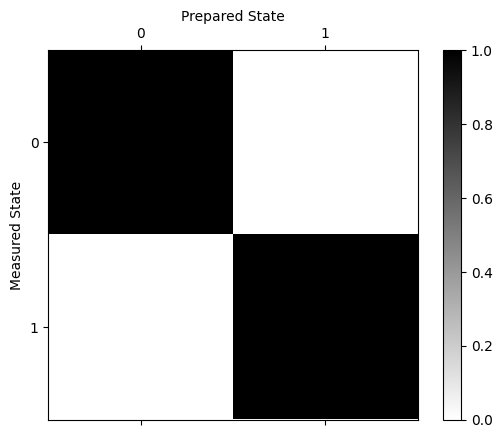

In [12]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel = 'mcal')
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())
meas_fitter.plot_calibration()

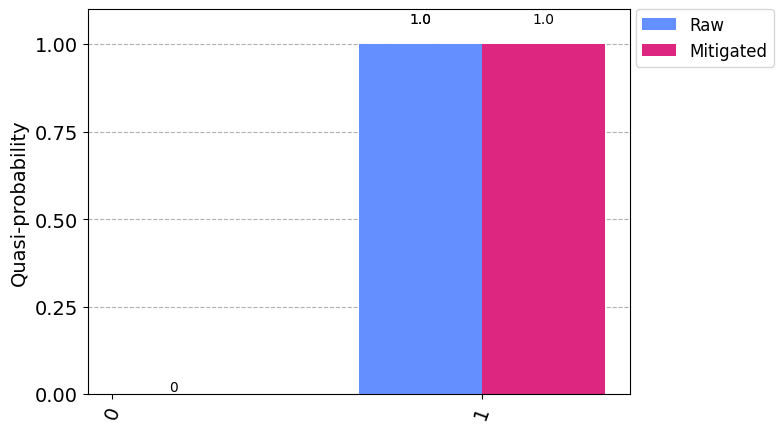

In [13]:
# Results without mitigation

t1_raw_counts_11 = t1_backend_result_11.get_counts(0)
# Get the filter object
meas_filter = meas_fitter.filter
t1_mitigated_results_11 = meas_filter.apply(t1_backend_result_11)

t1_mitigated_counts_11 = t1_mitigated_results_11.get_counts(0)

# T1 11 Mitigated Counts
plot_histogram([t1_raw_counts_11, t1_mitigated_counts_11], legend = ['Raw', 'Mitigated'])

In [14]:
def extract_counts(back_res, shots):
    lst_1 = []
    lst_0=[]

    for i in range(len(back_res.results)):
        counts = back_res.get_counts(i)
        if '1' in counts:
            prob_1 = counts['1'] / shots
        else:
            prob_1 = 0.0

        if '0' in counts:
            prob_2 = counts['0'] / shots
        else:
            prob_2 = 0.0

        lst_1.append(prob_1)
        lst_0.append(prob_2)


    return [lst_0, lst_1]


In [15]:
# T1 11 Raw
time = np.linspace(0, 74*4, 75)
t1raw_lst11_11 = extract_counts(t1_backend_result_11,shots)

# T1 11 Mitigated

t1mit_lst11_11 = extract_counts(t1_mitigated_results_11,shots)

<ipython-input-16-8abb40bdf991>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


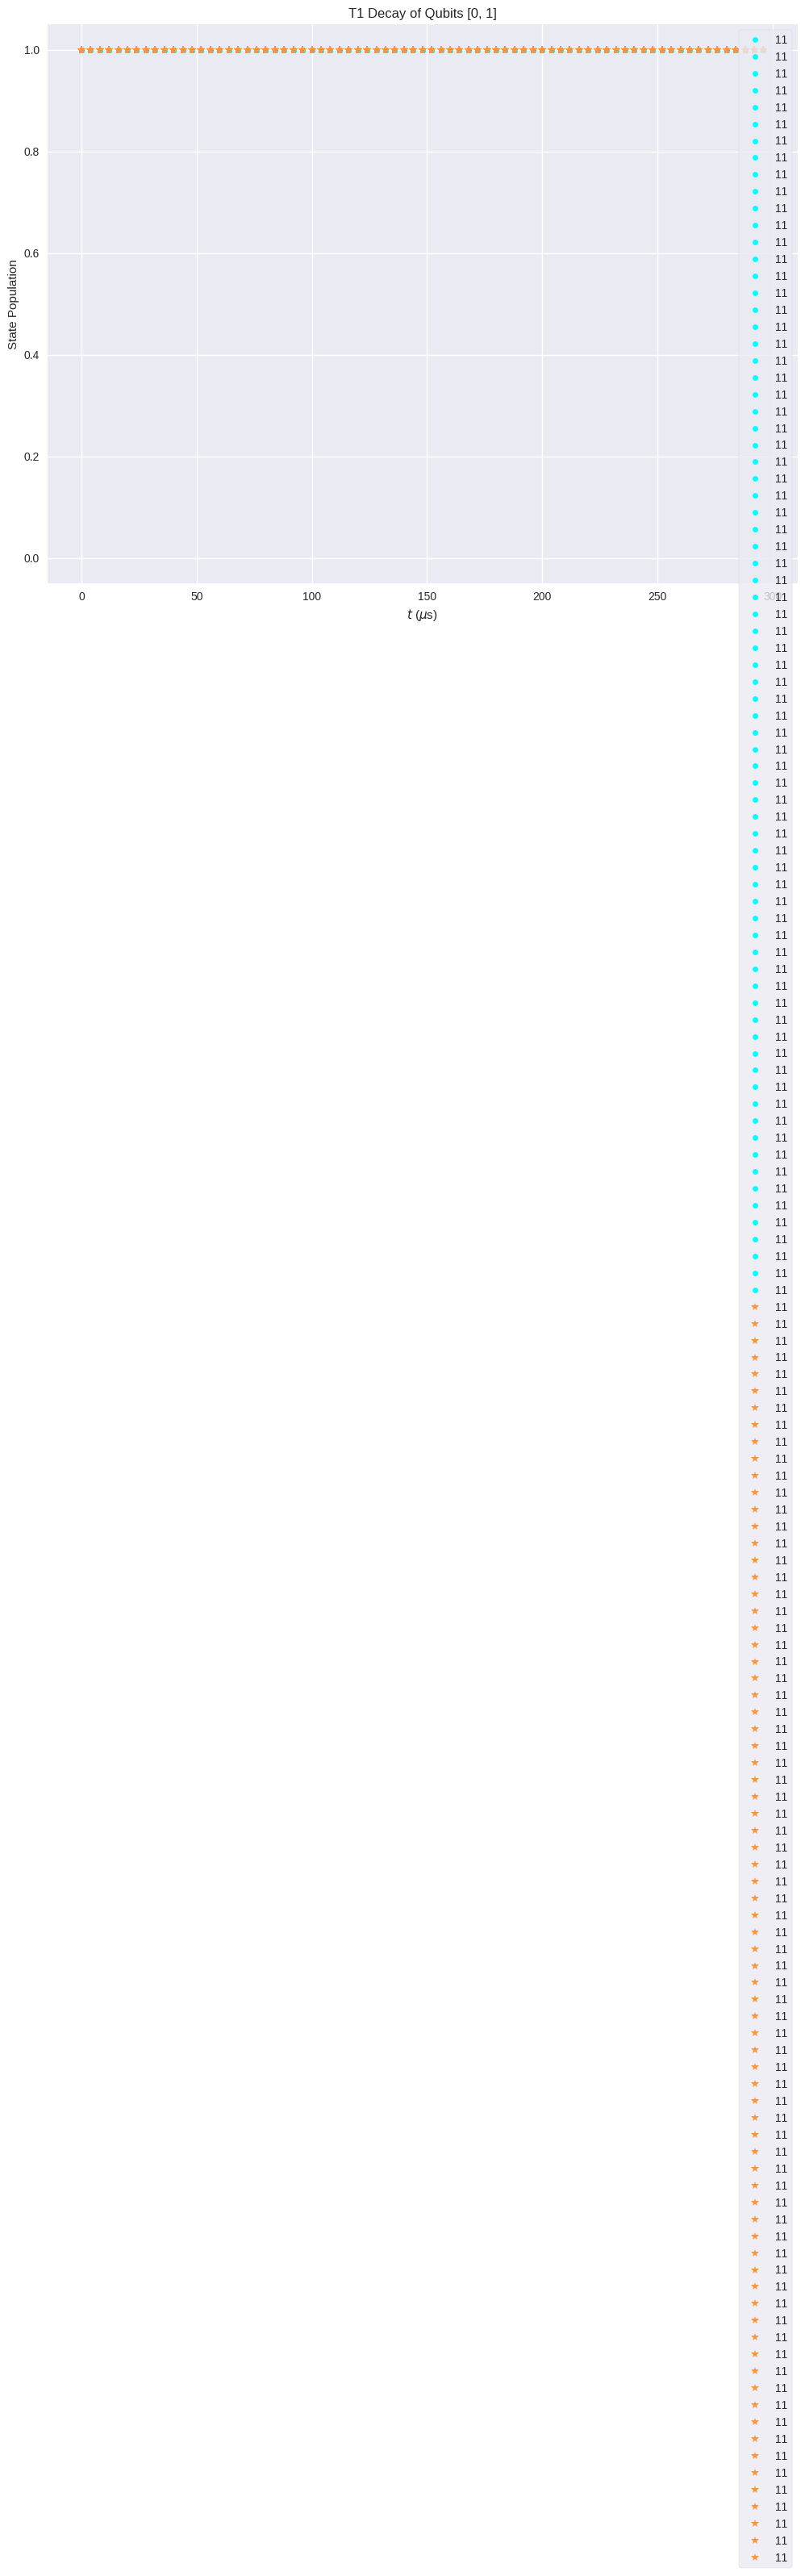

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

cool = pl.cm.cool(np.linspace(0, 1, N))
plasma = pl.cm.plasma(np.linspace(0, 1, N + 1))
magma = pl.cm.magma(np.linspace(0, 1, N))
winter = pl.cm.winter(np.linspace(0, 1, N))

%matplotlib inline
plt.style.use('seaborn')
# matplotlib.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

plt.title('T1 Decay of Qubits ' + str(qubits))
plt.xlabel('$t$ ($\mu$s)')
plt.ylabel('State Population')
plt.ylim(-0.05, 1.05)

t1mit_lst11_11_extended = [t1mit_lst11_11[-1]] * len(time)
t1raw_lst11_11_extended = [t1raw_lst11_11[-1]] * len(time)

plt.plot(time, t1mit_lst11_11_extended, label = "11", marker='.', markersize=10, linestyle='', c = cool[0])
plt.plot(time, t1raw_lst11_11_extended , label = "11", marker='*', markersize=7, linestyle='', c = plasma[3])

plt.legend(loc = "best", numpoints = 1, frameon = True)

plt.show()